In [132]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [133]:
def simulate(B,n, mu = 2, sigma =4, alpha = 0):
    
    matrix = np.random.normal(loc=mu, scale=sigma, size=(n, B))
    if alpha == 0:
        mean = np.mean(matrix, axis=0)
        return mean
    lower_limit = stats.norm.ppf(alpha/2, loc=mu, scale=sigma) # Lower trimming bound
    upper_limit = stats.norm.ppf(1 - alpha/2, loc=mu, scale=sigma)  # Upper trimming bound
    matrix_trimmed = np.where((matrix >= lower_limit) & (matrix <= upper_limit), matrix, np.nan)
    mean = np.nanmean(matrix_trimmed, axis=0)
    return mean

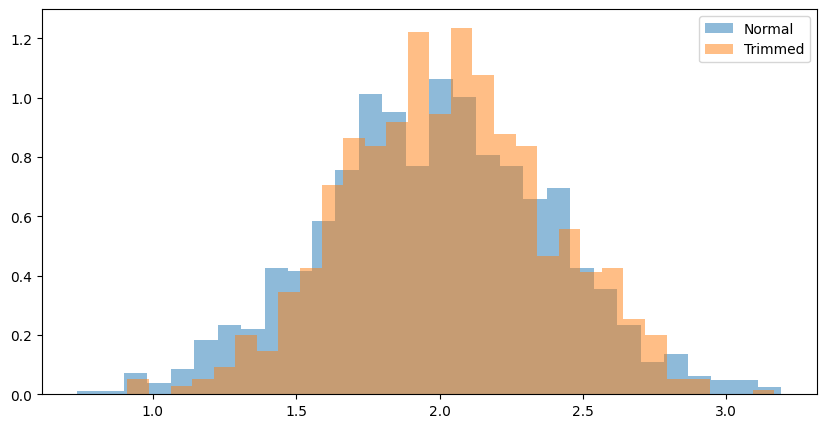

In [134]:
sim = simulate(1000, 100)
sim_trimmed = simulate(1000, 100, alpha=0.05)
plt.figure(figsize=(10,5))
plt.hist(sim, bins=30, density=True,alpha=0.5, label='Normal')
plt.hist(sim_trimmed, bins=30, density=True , alpha=0.5, label='Trimmed')
plt.legend()


In [135]:
#from simulation 
ARE = np.var(sim_trimmed)/np.var(sim)
print(ARE)

0.7674198308034779


In [ ]:
#from analytical solution

from scipy.stats import norm

# Given parameters
mu = 2
sigma = 4
alpha = 0.05
n = 100  # Sample size

# Calculate the symmetric trimming bounds
beta_1 = norm.ppf(alpha, loc=mu, scale=sigma)  # Lower trimming bound
beta_2 = norm.ppf(1 - alpha, loc=mu, scale=sigma)  # Upper trimming bound

# Standardize the bounds for a standard normal distribution
z_alpha = norm.ppf(alpha)  # Corresponds to (X_alpha - mu) / sigma
z_1_alpha = norm.ppf(1 - alpha)  # Corresponds to (X_1-alpha - mu) / sigma

# Compute φ and Φ values using the standard normal distribution
phi_1 = norm.pdf(z_alpha)  # PDF at lower bound
phi_2 = norm.pdf(z_1_alpha)  # PDF at upper bound
Phi_1 = norm.cdf(z_alpha)  # CDF at lower bound
Phi_2 = norm.cdf(z_1_alpha)  # CDF at upper bound
# Calculate the variance of the trimmed mean
var_trimmed = (sigma**2 / ((1 - 2 * alpha) ** 2 * n)) * (1 - ((z_1_alpha * phi_2 - z_alpha * phi_1) / (Phi_2 - Phi_1)))

# Variance of the sample mean
var_sample_mean = sigma**2 / n

# Calculate the Asymptotic Relative Efficiency (ARE) of the trimmed mean over the sample mean
ARE =  var_trimmed / var_sample_mean

# Print the results
print("Asymptotic Relative Efficiency (ARE):", ARE)


Asymptotic Relative Efficiency (ARE): 0.7691549186847947
